## Load library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from scipy import stats
from scipy.signal import find_peaks
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn import preprocessing 
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score
from pickle import dump
from numpy.random import seed
import tensorflow
from sklearn.model_selection import ShuffleSplit
from numpy import quantile

rseed = 1
seed(rseed)
tensorflow.random.set_seed(rseed)
sns.set(style="whitegrid")

# Data preprocessing

In [2]:
data = pd.read_csv('creditcard.csv') # Load data
data = data.drop(columns=['Time']) # drop unused variable 'Time'
print(data.isnull().values.any()) # Check if the data has missing value

data

False


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


0    284315
1       492
Name: Class, dtype: int64


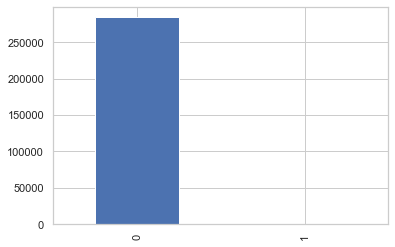

In [3]:
print(data["Class"].value_counts()) #Class distribution
data["Class"].value_counts().plot(kind='bar')

### Normalization

In [4]:
scaled = preprocessing.MinMaxScaler().fit_transform(data.values)
data_scale = pd.DataFrame(scaled, columns=data.columns, index=data.index)
data_scale

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0.0
5,0.951057,0.777393,0.857187,0.244472,0.768550,0.262721,0.268257,0.788178,0.443190,0.501038,...,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0.0
6,0.979184,0.768746,0.838200,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,...,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0.0
7,0.947348,0.782220,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,0.534571,...,0.592809,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0.0
8,0.943101,0.770278,0.835452,0.239894,0.783688,0.300439,0.267610,0.794515,0.449275,0.500230,...,0.560296,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0.0
9,0.952547,0.779072,0.855511,0.242081,0.769078,0.260539,0.269325,0.786131,0.437401,0.501132,...,0.557499,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0.0


### Data splitting

In [11]:
y = data_scale["Class"].values
X_normal, X_fraud = data_scale[y == 0].iloc[:,:-1], data_scale[y == 1].iloc[:,:-1]
Y_normal, Y_fraud = np.zeros(X_normal.shape[0]), np.ones(X_fraud.shape[0])

outlier_fraction = len(Y_fraud)/float(len(Y_normal))
print("Outlier fraction:", outlier_fraction)
print("Fraud Cases : {}".format(len(Y_fraud)))
print("Valid Cases : {}".format(len(Y_normal)))

# Splitting Train & Test of Normal data
X_train_normal, X_test_normal, Y_train_normal, Y_test_normal = train_test_split(X_normal, Y_normal, test_size=0.2)
# Splitting Train & Test of Fraud data
X_train_fraud, X_test_fraud, Y_train_fraud, Y_test_fraud = train_test_split(X_fraud, Y_fraud, test_size=0.2)

# Combine Train Normal & Fraud data
X_train_all = np.append(X_train_normal, X_train_fraud, axis = 0)
Y_train_all = np.append(Y_train_normal, Y_train_fraud).astype(int)

# Combine Test Normal & Fraud data
X_test_all = np.append(X_test_normal, X_test_fraud, axis = 0)
Y_test_all = np.append(Y_test_normal, Y_test_fraud).astype(int)

Outlier fraction: 0.0017304750013189597
Fraud Cases : 492
Valid Cases : 284315


# Model building & Evaluation

In [12]:
# GridSearch setting
cv = ShuffleSplit(test_size=0.2, n_splits=1, random_state=rseed)

def evaluation_matrix(Y_test_all, y_pred):
    print(classification_report(Y_test_all,y_pred))
    print("accuracy_score", accuracy_score(Y_test_all,y_pred))
    print("f1_score", f1_score(Y_test_all,y_pred,average=None))
    print("recall_score", recall_score(Y_test_all,y_pred,average=None))
    print("precision_score", precision_score(Y_test_all,y_pred,average=None))
    
    matrix = confusion_matrix(Y_test_all, y_pred)
    labels = ['Normal', 'Fraud']
    g=sns.heatmap(matrix,annot=True, cbar=False, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion matrix of IsolationForest')
    plt.show()

## Isolation forest (unsupervised)

In [25]:
param_grid = {'n_estimators': [100, 200],
            'max_samples': ['auto', 100],
            'contamination': [outlier_fraction, 'auto']}
f1_ms = make_scorer(f1_score, average='binary', pos_label=-1)

clf_if = IsolationForest(random_state=rseed)
clf_if = GridSearchCV(clf_if, param_grid, cv=cv, scoring=f1_ms, verbose=100)

# Provide class label with sklearn format
Y_train_all_2 = Y_train_all.copy()
Y_train_all_2[Y_train_all_2 == 1] = -1
Y_train_all_2[Y_train_all_2 == 0] = 1

clf_if.fit(X_train_all, Y_train_all_2)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] contamination=0.0017304750013189597, max_samples=auto, n_estimators=100 
[CV]  contamination=0.0017304750013189597, max_samples=auto, n_estimators=100, score=0.277, total=  15.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.5s remaining:    0.0s
[CV] contamination=0.0017304750013189597, max_samples=auto, n_estimators=200 
[CV]  contamination=0.0017304750013189597, max_samples=auto, n_estimators=200, score=0.284, total=  28.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   43.7s remaining:    0.0s
[CV] contamination=0.0017304750013189597, max_samples=100, n_estimators=100 
[CV]  contamination=0.0017304750013189597, max_samples=100, n_estimators=100, score=0.259, total=  14.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.7s remaining:    0.0s
[CV] contamination=0.0017304750013189597, max_samples=100, n_estimator

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=1, test_size=0.2, train_size=None),
             estimator=IsolationForest(random_state=1),
             param_grid={'contamination': [0.0017304750013189597, 'auto'],
                         'max_samples': ['auto', 100],
                         'n_estimators': [100, 200]},
             scoring=make_scorer(f1_score, average=binary, pos_label=-1),
             verbose=100)

In [26]:
# Gridsearch Parameter Tuning result
print(clf_if.best_params_)
print(clf_if.best_score_)
dump(clf_if.best_estimator_, open('isolation_forest.pkl', 'wb'))

{'contamination': 0.0017304750013189597, 'max_samples': 'auto', 'n_estimators': 200}
0.2838709677419355


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.28      0.27      0.28        99

    accuracy                           1.00     56962
   macro avg       0.64      0.64      0.64     56962
weighted avg       1.00      1.00      1.00     56962

accuracy_score 0.99750711000316
f1_score [0.99875141 0.2755102 ]
recall_score [0.99876897 0.27272727]
precision_score [0.99873384 0.27835052]


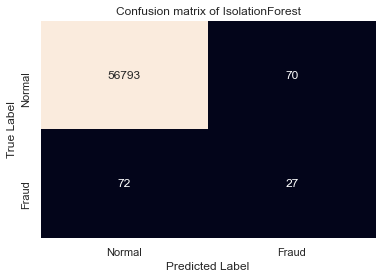

In [27]:
y_pred = clf_if.best_estimator_.predict(X_test_all)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

evaluation_matrix(Y_test_all, y_pred)

## Random forest (supervised)

In [13]:
param_grid = {'n_estimators': [100, 200],
              'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5]}

f1_ms = make_scorer(f1_score, average='binary', pos_label=1)

clf_rf = RandomForestClassifier(random_state=rseed)
clf_rf = GridSearchCV(clf_rf, param_grid, cv=cv, scoring=f1_ms, verbose=100)
clf_rf.fit(X_train_all, Y_train_all)

Fitting 1 folds for each of 8 candidates, totalling 8 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] criterion=gini, min_samples_split=2, n_estimators=100 ...........


KeyboardInterrupt: 

In [35]:
# Gridsearch Parameter Tuning result
print(clf_rf.best_params_)
print(clf_rf.best_score_)
dump(clf_rf.best_estimator_, open('random_forest.pkl', 'wb'))

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 100}
1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00        99

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

accuracy_score 1.0
f1_score [1. 1.]
recall_score [1. 1.]
precision_score [1. 1.]


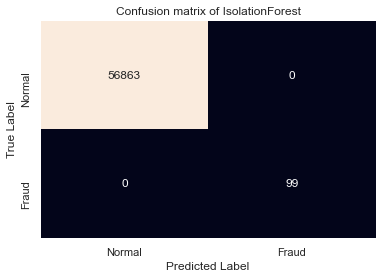

In [36]:
y_pred = clf_rf.best_estimator_.predict(X_test_all)
y_probs = clf_rf.best_estimator_.predict_proba(X_test_all)[:,1]

evaluation_matrix(Y_test_all, y_pred)

## One-class SVM (semi-supervised)

In [28]:
param_grid = {'kernel': ['rbf'],
             'gamma': ['scale', 0.1, 1],
             'nu': [0.1, 0.5, 1]}
f1_ms = make_scorer(f1_score)

clf_svm = OneClassSVM()
clf_svm = GridSearchCV(clf_svm, param_grid, cv=cv, scoring=f1_ms, verbose=100)

Y_train_normal_2 = Y_train_normal[:len(Y_train_normal)//10].copy()
Y_train_normal_2[Y_train_normal_2 == 1] = -1
Y_train_normal_2[Y_train_normal_2 == 0] = 1

clf_svm.fit(X_train_normal[:len(X_train_normal)//10], Y_train_normal_2)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] gamma=scale, kernel=rbf, nu=0.1 .................................
[CV] ..... gamma=scale, kernel=rbf, nu=0.1, score=0.942, total=   2.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[CV] gamma=scale, kernel=rbf, nu=0.5 .................................
[CV] ..... gamma=scale, kernel=rbf, nu=0.5, score=0.669, total=  12.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s remaining:    0.0s
[CV] gamma=scale, kernel=rbf, nu=1 ...................................
[CV] ....... gamma=scale, kernel=rbf, nu=1, score=0.000, total=  12.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.4s remaining:    0.0s
[CV] gamma=0.1, kernel=rbf, nu=0.1 ...................................
[CV] ....... gamma=0.1, kernel=rbf, nu=0.1, score=0.942, total=   2.8s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=1, test_size=0.2, train_size=None),
             estimator=OneClassSVM(),
             param_grid={'gamma': ['scale', 0.1, 1], 'kernel': ['rbf'],
                         'nu': [0.1, 0.5, 1]},
             scoring=make_scorer(f1_score), verbose=100)

In [29]:
# Gridsearch Parameter Tuning result
print(clf_svm.best_params_)
print(clf_svm.best_score_)
dump(clf_svm.best_estimator_, open('oneclass_svm.pkl', 'wb'))

{'gamma': 0.1, 'kernel': 'rbf', 'nu': 0.1}
0.9424619318842263


              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56863
           1       0.02      1.00      0.03        99

    accuracy                           0.90     56962
   macro avg       0.51      0.95      0.49     56962
weighted avg       1.00      0.90      0.94     56962

accuracy_score 0.8981601769600787
f1_score [0.94624971 0.0330055 ]
recall_score [0.89798287 1.        ]
precision_score [1.         0.01677966]


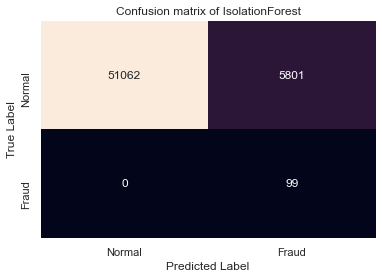

In [30]:
y_pred = clf_svm.best_estimator_.predict(X_test_all)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

evaluation_matrix(Y_test_all, y_pred)

## One-class Autoencoder
1. Hybrid (semi-supervised & supervised): encoder + classifier
1. Semi-supervised: using threshold

In [9]:
def create_model(optimizer='Adam', encoded_neuron=32):
    input_layer = Input(shape=(X_train_normal.shape[1],))

    ## encoding part
    encoded = Dense(encoded_neuron*4, activation='relu')(input_layer)
    encoded = Dense(encoded_neuron*2, activation='relu')(encoded)
    encoded = Dense(encoded_neuron, activation='relu')(encoded)

    ## decoding part
    decoded = Dense(encoded_neuron, activation='relu')(encoded)
    decoded = Dense(encoded_neuron*2, activation='relu')(decoded)
    decoded = Dense(encoded_neuron*4, activation='relu')(decoded)

    ## output layer
    output_layer = Dense(X_train_normal.shape[1], activation='sigmoid')(decoded)

    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer=optimizer, loss="mse")
    
    return autoencoder

In [10]:
params = {'optimizer': ['Adam', 'SGD'],
          'encoded_neuron': [8, 16, 32]}

autoencoder = KerasRegressor(build_fn=create_model)

autoencoder_grid = GridSearchCV(autoencoder, param_grid=params, cv=cv, verbose=100, scoring='neg_mean_squared_error') 

autoencoder_grid.fit(X_train_normal, X_train_normal, shuffle=True, batch_size=100, epochs=100)

Fitting 1 folds for each of 6 candidates, totalling 6 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] encoded_neuron=8, optimizer=Adam ................................
Epoch 1/100
1820/1820 [==============================] - 1s 606us/step - loss: 0.0027
Epoch 2/100
1820/1820 [==============================] - 1s 604us/step - loss: 0.0013
Epoch 3/100
1820/1820 [==============================] - 1s 597us/step - loss: 0.0011
Epoch 4/100
1820/1820 [==============================] - 1s 604us/step - loss: 0.0010
Epoch 5/100
1820/1820 [==============================] - 1s 601us/step - loss: 0.0010
Epoch 6/100
1820/1820 [==============================] - 1s 593us/step - loss: 8.5295e-04
Epoch 7/100
1820/1820 [==============================] - 1s 590us/step - loss: 8.0007e-04
Epoch 8/100
1820/1820 [==============================] - 1s 595us/step - loss: 6.9026e-04
Epoch 9/100
1820/1820 [==============================] - 1s 583us/step - loss: 6.7244e-04

1820/1820 [==============================] - 1s 596us/step - loss: 4.0556e-04
Epoch 90/100
1820/1820 [==============================] - 1s 590us/step - loss: 4.0250e-04
Epoch 91/100
1820/1820 [==============================] - 1s 610us/step - loss: 3.9868e-04
Epoch 92/100
1820/1820 [==============================] - 1s 594us/step - loss: 3.9554e-04
Epoch 93/100
1820/1820 [==============================] - 1s 592us/step - loss: 3.9266e-04
Epoch 94/100
1820/1820 [==============================] - 1s 592us/step - loss: 3.8989e-04
Epoch 95/100
1820/1820 [==============================] - 1s 596us/step - loss: 3.8606e-04
Epoch 96/100
1820/1820 [==============================] - 1s 592us/step - loss: 3.8448e-04
Epoch 97/100
1820/1820 [==============================] - 1s 591us/step - loss: 3.8242e-04
Epoch 98/100
1820/1820 [==============================] - 1s 592us/step - loss: 3.8145e-04
Epoch 99/100
1820/1820 [==============================] - 1s 595us/step - loss: 3.8073e-04
Epoch 100/10

1820/1820 [==============================] - 1s 690us/step - loss: 1.4827e-04
Epoch 69/100
1820/1820 [==============================] - 1s 692us/step - loss: 1.4814e-04
Epoch 70/100
1820/1820 [==============================] - 1s 693us/step - loss: 1.4760e-04
Epoch 71/100
1820/1820 [==============================] - 1s 684us/step - loss: 1.4754e-04
Epoch 72/100
1820/1820 [==============================] - 1s 707us/step - loss: 1.4700e-04
Epoch 73/100
1820/1820 [==============================] - 1s 690us/step - loss: 1.4632e-04
Epoch 74/100
1820/1820 [==============================] - 1s 706us/step - loss: 1.4624e-04
Epoch 75/100
1820/1820 [==============================] - 1s 690us/step - loss: 1.4581e-04
Epoch 76/100
1820/1820 [==============================] - 1s 690us/step - loss: 1.4558e-04
Epoch 77/100
1820/1820 [==============================] - 1s 686us/step - loss: 1.4497e-04
Epoch 78/100
1820/1820 [==============================] - 1s 686us/step - loss: 1.4541e-04
Epoch 79/100

1820/1820 [==============================] - 2s 1ms/step - loss: 2.5826e-05
Epoch 49/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.5823e-05
Epoch 50/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.5614e-05
Epoch 51/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.5475e-05
Epoch 52/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.5248e-05
Epoch 53/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.4890e-05
Epoch 54/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.5160e-05
Epoch 55/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.4473e-05
Epoch 56/100
1820/1820 [==============================] - 2s 974us/step - loss: 2.4611e-05
Epoch 57/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.4399e-05
Epoch 58/100
1820/1820 [==============================] - 2s 1ms/step - loss: 2.3973e-05
Epoch 59/100
1820/1820 [========

2275/2275 [==============================] - 2s 1ms/step - loss: 2.0495e-05
Epoch 29/100
2275/2275 [==============================] - 2s 1ms/step - loss: 2.0180e-05
Epoch 30/100
2275/2275 [==============================] - 2s 996us/step - loss: 2.4107e-05
Epoch 31/100
2275/2275 [==============================] - 2s 1ms/step - loss: 1.9819e-05
Epoch 32/100
2275/2275 [==============================] - 2s 1ms/step - loss: 1.9229e-05
Epoch 33/100
2275/2275 [==============================] - 2s 1ms/step - loss: 1.9020e-05
Epoch 34/100
2275/2275 [==============================] - 2s 996us/step - loss: 1.8844e-05
Epoch 35/100
2275/2275 [==============================] - 2s 1ms/step - loss: 1.8856e-05
Epoch 36/100
2275/2275 [==============================] - 2s 993us/step - loss: 1.8246e-05
Epoch 37/100
2275/2275 [==============================] - 2s 995us/step - loss: 1.8477e-05
Epoch 38/100
2275/2275 [==============================] - 2s 992us/step - loss: 1.7898e-05
Epoch 39/100
2275/2275 [

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=1, test_size=0.2, train_size=None),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x0000017D12954F40>,
             param_grid={'encoded_neuron': [8, 16, 32],
                         'optimizer': ['Adam', 'SGD']},
             scoring='neg_mean_squared_error', verbose=100)

In [11]:
# Gridsearch Parameter Tuning result
print(autoencoder_grid.best_params_)
print(autoencoder_grid.best_score_)
autoencoder_grid.best_estimator_.model.save('oneclass_ae.h5')

{'encoded_neuron': 32, 'optimizer': 'Adam'}
-2.1862270360757218e-05


### Hybrid (semi-supervised & supervised): encoder + classifier

In [12]:
# Encoder
encoder = Sequential()
encoder.add(autoencoder_grid.best_estimator_.model.layers[0])
encoder.add(autoencoder_grid.best_estimator_.model.layers[1])
encoder.add(autoencoder_grid.best_estimator_.model.layers[2])

train_all_rep = encoder.predict(X_train_all)
test_all_rep = encoder.predict(X_test_all)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.93      0.96        99

    accuracy                           1.00     56962
   macro avg       1.00      0.96      0.98     56962
weighted avg       1.00      1.00      1.00     56962

accuracy_score 0.9998771110564938
f1_score [0.99993845 0.96335079]
recall_score [1.         0.92929293]
precision_score [0.99987691 1.        ]


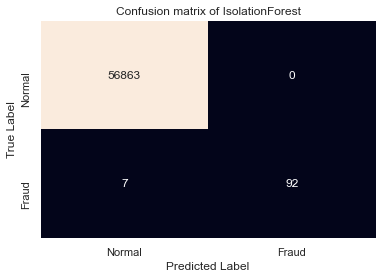

In [13]:
# classifier
clf = LogisticRegression().fit(train_all_rep, Y_train_all)
y_pred = clf.predict(test_all_rep)
evaluation_matrix(Y_test_all, y_pred)

### Semi-supervised: error threshold-based

In [14]:
# Get reconstruction error of train normal data
pred = autoencoder_grid.best_estimator_.model.predict(X_train_normal)
mse = np.mean(np.power(X_train_normal - pred, 2), axis=1)

error_train = pd.DataFrame({'reconstruction_error': mse, 'true_class': Y_train_normal})
error_train

,reconstruction_error,true_class
176561,0.000003,0.0
246293,0.000006,0.0
211214,0.000005,0.0
36088,0.000002,0.0
87505,0.000006,0.0
...,...,...
21526,0.000002,0.0
117827,0.000002,0.0
73527,0.000003,0.0
267816,0.000002,0.0


In [15]:
# Get maximum error as threshold
threshold = max(error_train['reconstruction_error'].values)
threshold

0.005889626284892677

In [16]:
# Get reconstruction error of train data
pred = autoencoder_grid.best_estimator_.model.predict(X_test_all)
mse = np.mean(np.power(X_test_all - pred, 2), axis=1)

error_test = pd.DataFrame({'reconstruction_error': mse, 'true_class': Y_test_all})
error_test

,reconstruction_error,true_class
0,0.000003,0
1,0.000002,0
2,0.000003,0
3,0.000002,0
4,0.000008,0
...,...,...
56957,0.035148,1
56958,0.039324,1
56959,0.040336,1
56960,0.035216,1


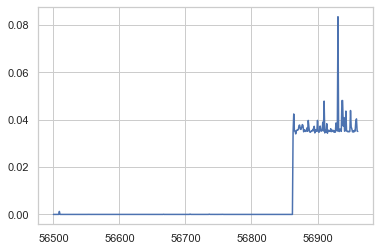

In [17]:
error_test.iloc[56500:,0].plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00        99

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

accuracy_score 1.0
f1_score [1. 1.]
recall_score [1. 1.]
precision_score [1. 1.]


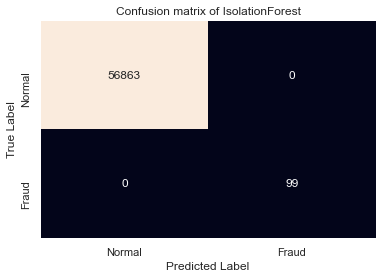

In [18]:
# prediction
y_pred = [1 if e > threshold else 0 for e in error_test.reconstruction_error.values]
evaluation_matrix(error_test.true_class, y_pred)